<a href="https://colab.research.google.com/github/paridhi-pandey/web-scraping-day-4/blob/main/WebScraping(DAY_4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/My Drive/prsindia_monthly_policy.csv'
import pandas as pd

df = pd.read_csv(file_path)

In [ ]:
df.head()

,Title,Date,Link
0,Monthly Policy Review - June 2025,"Jul 01, 2025",https://prsindia.org/policy/monthly-policy-rev...
1,Monthly Policy Review - May 2025,"Jun 01, 2025",https://prsindia.org/policy/monthly-policy-rev...
2,Monthly Policy Review - April 2025,"May 01, 2025",https://prsindia.org/policy/monthly-policy-rev...
3,Monthly Policy Review - March 2025,"Apr 01, 2025",https://prsindia.org/policy/monthly-policy-rev...
4,Monthly Policy Review - February 2025,"Mar 01, 2025",https://prsindia.org/policy/monthly-policy-rev...


In [ ]:
!apt-get update > /dev/null
!apt-get install -y chromium-chromedriver > /dev/null
!pip install selenium > /dev/null

import sys
sys.path.insert(0, '/usr/lib/chromium-browser/chromedriver')


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import pandas as pd

# Configure headless Chrome
options = Options()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

# Launch browser
driver = webdriver.Chrome(options=options)

# Target URL (replace with your site)
url = 'https://www.worldometers.info/world-population/population-by-country/'

driver.get(url)

# Parse with BeautifulSoup
soup = BeautifulSoup(driver.page_source, 'html.parser')
driver.quit()

# Find the table
table = soup.find('table')

# Parse table
headers = [th.text.strip() for th in table.find_all('th')]
rows = []
for tr in table.find_all('tr')[1:]:
    cells = [td.text.strip() for td in tr.find_all(['td', 'th'])]
    if cells:
        rows.append(cells)

df = pd.DataFrame(rows, columns=headers)

# Show result
df.head()


,#,Country (ordependency),Population(2025),YearlyChange,NetChange,Density(P/Km²),Land Area(Km²),Migrants(net),Fert.Rate,MedianAge,UrbanPop %,WorldShare
0,1,India,"1,463,865,525",0.89%,"12,929,734",492,"2,973,190","−495,753",1.94,28.8,37.1%,17.78%
1,2,China,"1,416,096,094",−0.23%,"−3,225,184",151,"9,388,211","−268,126",1.02,40.1,67.5%,17.20%
2,3,United States,"347,275,807",0.54%,"1,849,236",38,"9,147,420","1,230,663",1.62,38.5,82.8%,4.22%
3,4,Indonesia,"285,721,236",0.79%,"2,233,305",158,"1,811,570","−39,509",2.1,30.4,59.6%,3.47%
4,5,Pakistan,"255,219,554",1.57%,"3,950,390",331,"770,880","−1,235,336",3.5,20.6,34.4%,3.10%


In [ ]:
csv_path = '/content/drive/My Drive/scraped_table.csv'
df.to_csv(csv_path, index=False)
print(f"Saved CSV to: {csv_path}")

Saved CSV to: /content/drive/My Drive/scraped_table.csv


In [ ]:
import sqlite3

In [ ]:
# Connect to (or create) a database file
db_path = '/content/drive/My Drive/scraped_data.db'
conn = sqlite3.connect(db_path)

# Write DataFrame to a table named 'scraped_table'
df.to_sql('scraped_table', conn, if_exists='replace', index=False)

# Optional: Verify with a query
result_df = pd.read_sql('SELECT * FROM scraped_table LIMIT 5;', conn)
print(result_df)

# Close the connection
conn.close()

print(f"Saved table to SQLite database at: {db_path}")


   # Country (ordependency) Population(2025) YearlyChange   NetChange  \
0  1                  India    1,463,865,525        0.89%  12,929,734   
1  2                  China    1,416,096,094       −0.23%  −3,225,184   
2  3          United States      347,275,807        0.54%   1,849,236   
3  4              Indonesia      285,721,236        0.79%   2,233,305   
4  5               Pakistan      255,219,554        1.57%   3,950,390   

  Density(P/Km²) Land Area(Km²) Migrants(net) Fert.Rate MedianAge UrbanPop %  \
0            492      2,973,190      −495,753      1.94      28.8      37.1%   
1            151      9,388,211      −268,126      1.02      40.1      67.5%   
2             38      9,147,420     1,230,663      1.62      38.5      82.8%   
3            158      1,811,570       −39,509       2.1      30.4      59.6%   
4            331        770,880    −1,235,336       3.5      20.6      34.4%   

  WorldShare  
0     17.78%  
1     17.20%  
2      4.22%  
3      3.47%  
4    

In [ ]:
!pip install matplotlib seaborn

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: Set Seaborn style
sns.set(style="whitegrid")

# Example: Load scraped data (adjust path as needed)
df = pd.read_csv('/content/drive/My Drive/scraped_table.csv')

# Preview
df.head()

,#,Country (ordependency),Population(2025),YearlyChange,NetChange,Density(P/Km²),Land Area(Km²),Migrants(net),Fert.Rate,MedianAge,UrbanPop %,WorldShare
0,1,India,"1,463,865,525",0.89%,"12,929,734",492,"2,973,190","−495,753",1.94,28.8,37.1%,17.78%
1,2,China,"1,416,096,094",−0.23%,"−3,225,184",151,"9,388,211","−268,126",1.02,40.1,67.5%,17.20%
2,3,United States,"347,275,807",0.54%,"1,849,236",38,"9,147,420","1,230,663",1.62,38.5,82.8%,4.22%
3,4,Indonesia,"285,721,236",0.79%,"2,233,305",158,"1,811,570","−39,509",2.10,30.4,59.6%,3.47%
4,5,Pakistan,"255,219,554",1.57%,"3,950,390",331,"770,880","−1,235,336",3.50,20.6,34.4%,3.10%


In [ ]:
print(df.columns.tolist())


['#', 'Country (ordependency)', 'Population(2025)', 'YearlyChange', 'NetChange', 'Density(P/Km²)', 'Land Area(Km²)', 'Migrants(net)', 'Fert.Rate', 'MedianAge', 'UrbanPop %', 'WorldShare']


/tmp/ipython-input-5-854942486.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country (ordependency)', y='Population(2025)', data=top10, palette='Blues_d')


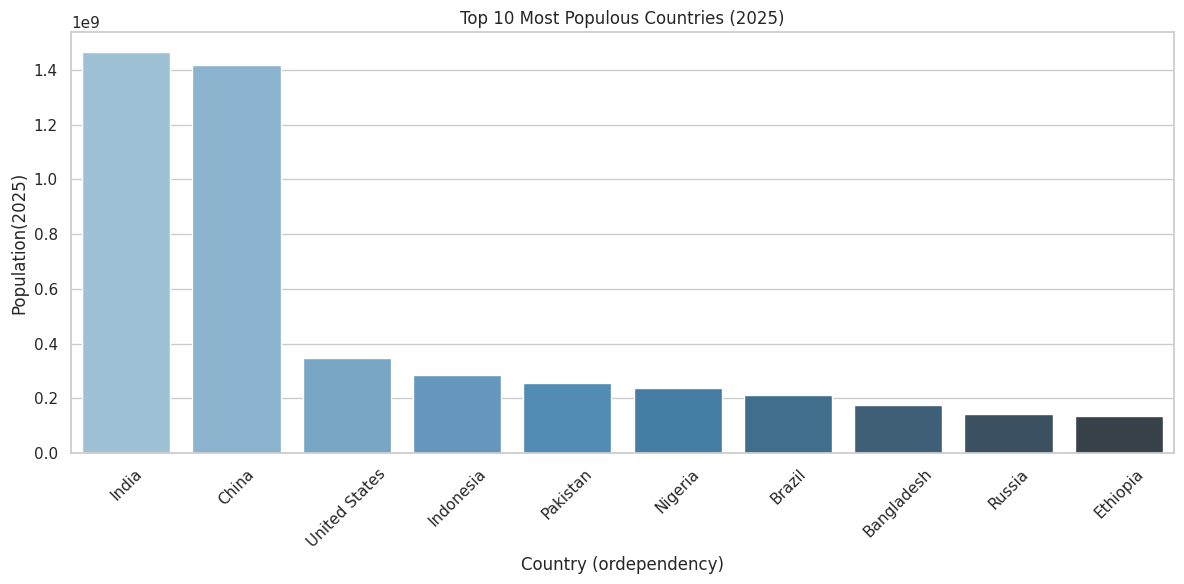

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Clean column names
df.columns = df.columns.str.strip()

# Convert population column to numeric
df['Population(2025)'] = df['Population(2025)'].str.replace(',', '').astype(int)

# Get top 10 countries by population
top10 = df.nlargest(10, 'Population(2025)')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Country (ordependency)', y='Population(2025)', data=top10, palette='Blues_d')
plt.title('Top 10 Most Populous Countries (2025)')
plt.xticks(rotation=45)
plt.tight_layout()

# Save and show
plt.savefig('/content/drive/My Drive/top10_population_2025.png')
plt.show()


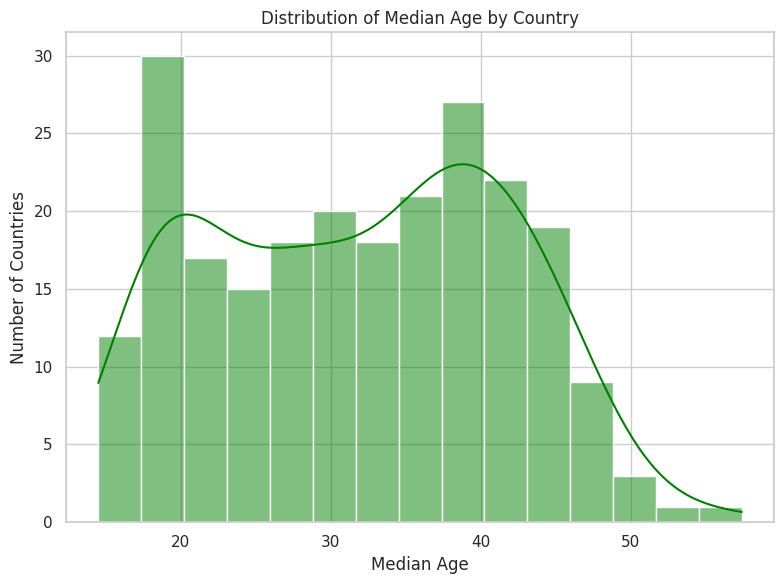

In [ ]:
# Convert 'MedianAge' to numeric
df['MedianAge'] = pd.to_numeric(df['MedianAge'], errors='coerce')

# Plot histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['MedianAge'].dropna(), bins=15, kde=True, color='green')
plt.title('Distribution of Median Age by Country')
plt.xlabel('Median Age')
plt.ylabel('Number of Countries')
plt.tight_layout()

# Save and show
plt.savefig('/content/drive/My Drive/median_age_histogram.png')
plt.show()
